In [3]:
!pip install missingno


In [5]:
### Wine Products Data Cleaning Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [19]:

# Load Wine Data (Ensure correct file path)
wine_file_path = r"C:\Users\payal\Downloads\wine+quality\winequality-red.csv"
wine_df = pd.read_csv(wine_file_path, sep=';')

print("Wine Data Head:")
print(wine_df.head())

Wine Data Head:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2   

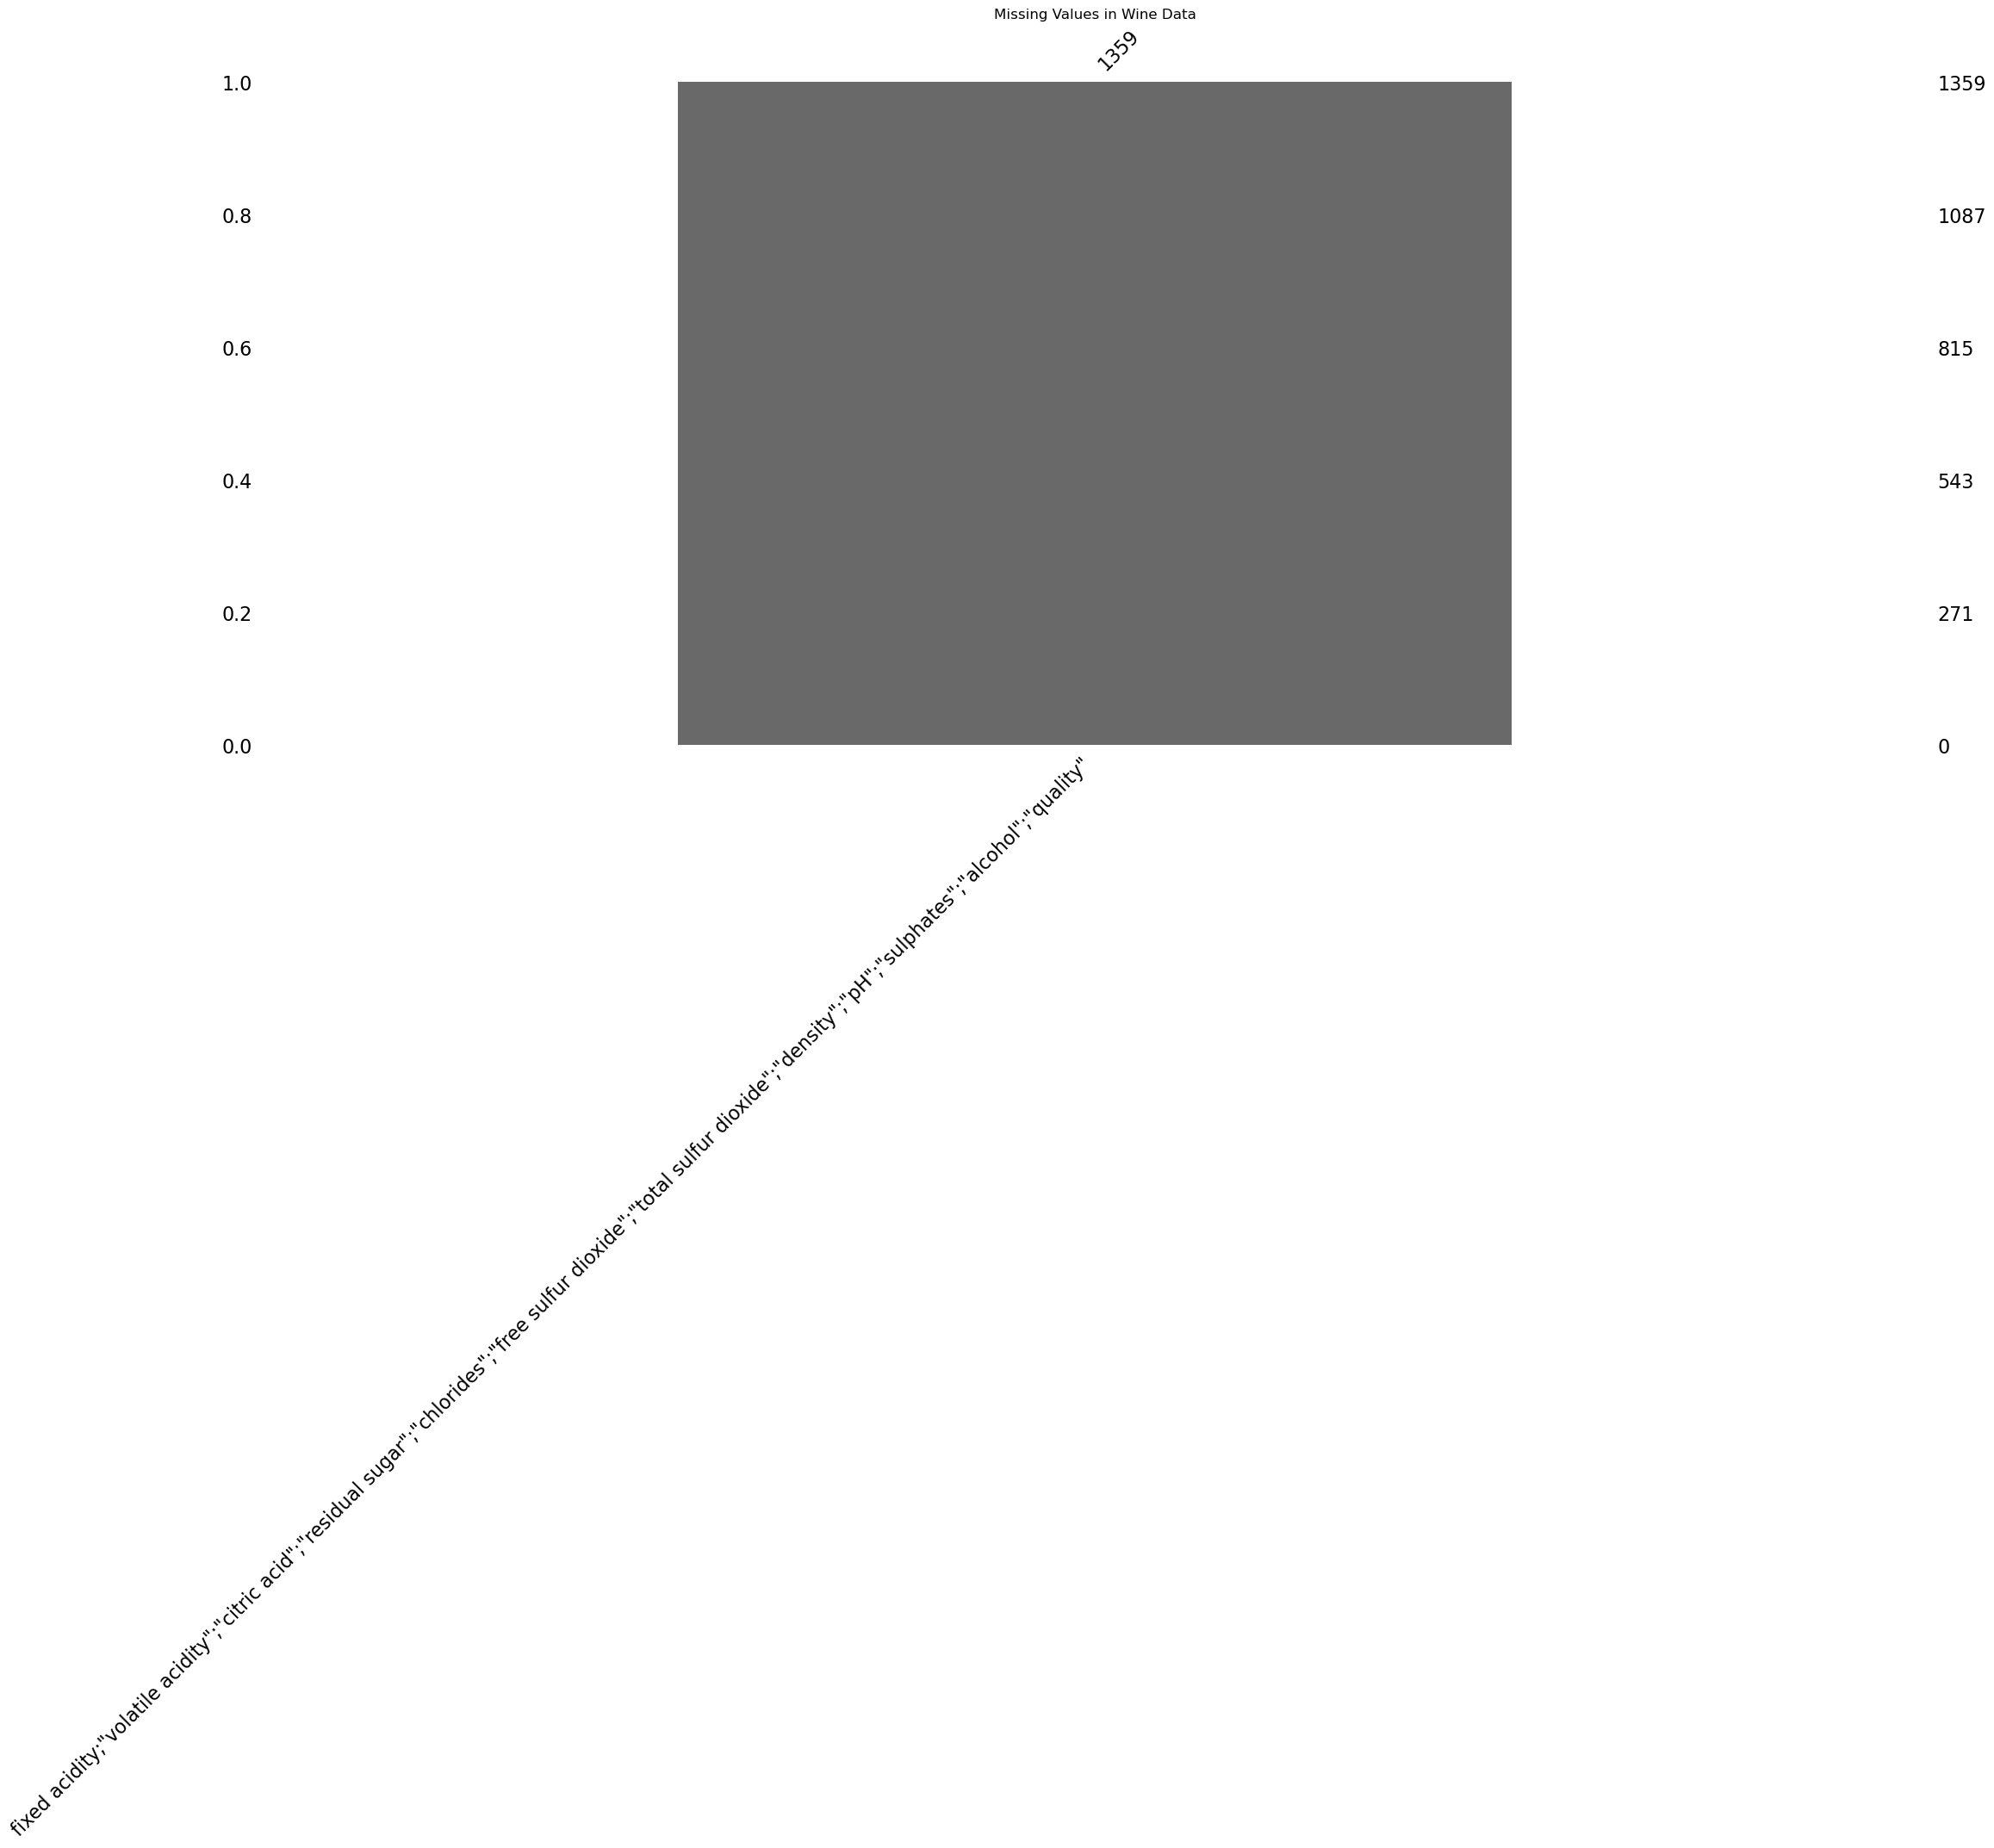

In [8]:
# Missing Values Visualization
plt.figure(figsize=(10,5))
msno.bar(wine_df)
plt.title("Missing Values in Wine Data")
plt.show()

In [26]:

# Data Cleaning
wine_df.drop_duplicates(inplace=True)  # Remove Duplicates
wine_df.dropna(inplace=True)  # Drop missing values

In [25]:


# Convert to numeric to avoid issues in correlation matrix
wine_df = wine_df.apply(pd.to_numeric, errors='coerce')

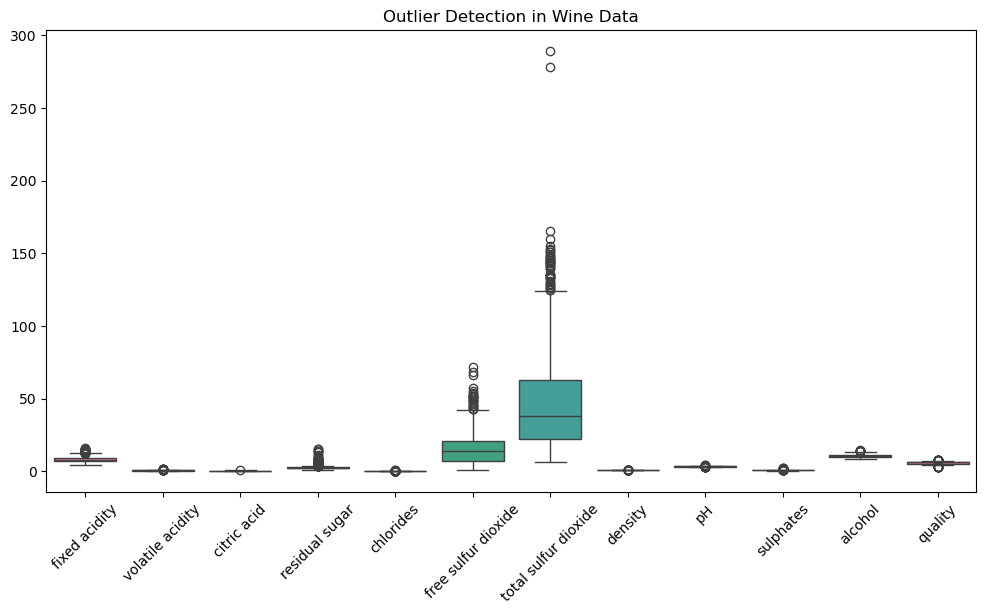

In [29]:

# Detecting Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=wine_df)
plt.title("Outlier Detection in Wine Data")
plt.xticks(rotation=45)
plt.show()

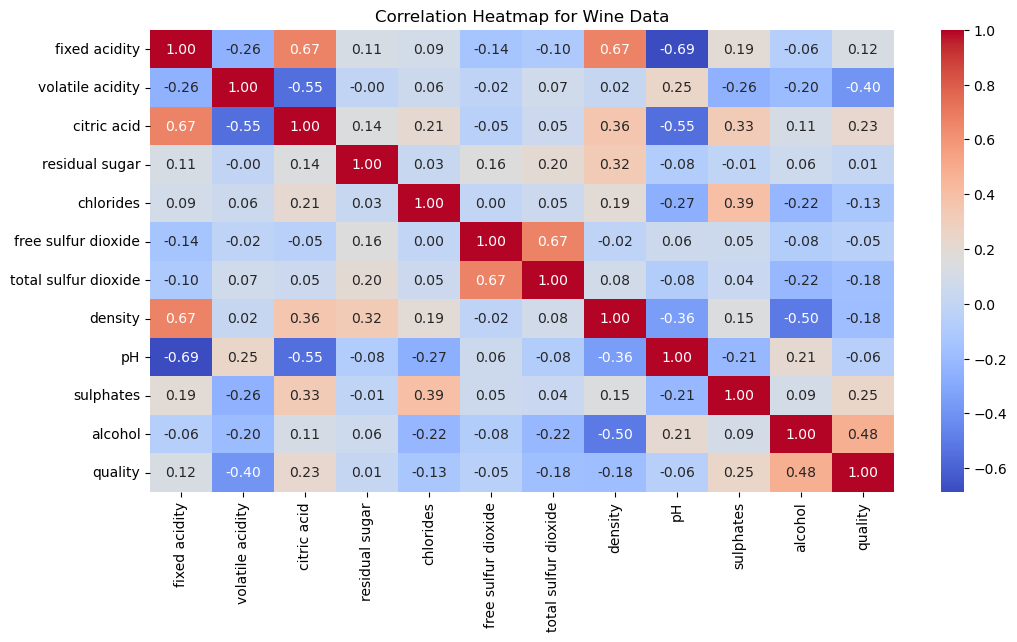

In [30]:

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Wine Data")
plt.show()


In [34]:
# Summary statistics
print(wine_df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000         

In [35]:

# Export Cleaned Data
wine_df.to_csv('cleaned_wine_data.csv', index=False)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [44]:

# Selecting features and target variable
X = wine_df.drop(columns=['quality'])  # Features
y = wine_df['quality']  # Target variable


In [45]:

# Splitting dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)